# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome: Arthur Pontes Nader
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
# YOUR CODE HERE

def randomForest(data, k, numEstimadores, profundidade):

  #Variavel alvo
  y = data.target

  #Restante dos dados
  x = pd.DataFrame(data.data,columns =[data.feature_names]).values

  #Criacao do modelo classificador
  modelo = RandomForestClassifier(n_estimators = numEstimadores, max_depth = profundidade)

  #Criacao do KFold
  kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=703)

  #Listas que irao guardar os resultados obtidos
  precisao = []
  revocacao = []
  f1 = []
  matrizes = []

  #Geracao dos resultados
  for treino, teste in kfold.split(x, y):
      x_treino, x_teste = x[treino], x[teste]
      y_treino, y_teste = y[treino], y[teste]
      modelo.fit(x_treino, y_treino)

      #avaliacao do modelo
      predicao = modelo.predict(x_teste)
      precisao.append(metrics.precision_score(y_teste, predicao))
      revocacao.append(metrics.recall_score(y_teste, predicao))
      f1.append(metrics.f1_score(y_teste, predicao))
      matrizes.append(metrics.confusion_matrix(y_teste, predicao))

  precisao.append(np.mean(precisao))
  revocacao.append(np.mean(revocacao))
  f1_mean = np.mean(f1)
  f1.append(f1_mean)

  # Exibicao dos resultados obtidos
  print(f"Configuracao: {numEstimadores} estimadores, {profundidade} profundidade maxima\nResultados:\n")

  resultados = pd.DataFrame([ precisao, revocacao,f1], columns = ["Iteracao 1","Iteracao 2","Iteracao 3","Iteracao 4","Iteracao 5","Media"])
  resultados.rename(index={0: 'precisao',1: 'revocacao',2: 'f1'},inplace=True)
  display(resultados)

  for i in range(k):
    print("\nMatriz de confusao da iteracao ", i+1)
    print(matrizes[i])

  return f1_mean


In [ ]:
resultados_tabela = {}

numeroEstimadores = 2
profundidade = 3
f1 = randomForest(cancer, SPLITS, numeroEstimadores, profundidade)
resultados_tabela[f"Random Forest\n n = {numeroEstimadores} p = {profundidade}"] = f1

Configuracao: 2 estimadores, 3 profundidade maxima
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.956522,0.931507,0.972222,0.957746,0.969697,0.957539
revocacao,0.929577,0.957746,0.972222,0.944444,0.901408,0.941080
f1,0.942857,0.944444,0.972222,0.951049,0.934307,0.948976



Matriz de confusao da iteracao  1
[[40  3]
 [ 5 66]]

Matriz de confusao da iteracao  2
[[38  5]
 [ 3 68]]

Matriz de confusao da iteracao  3
[[40  2]
 [ 2 70]]

Matriz de confusao da iteracao  4
[[39  3]
 [ 4 68]]

Matriz de confusao da iteracao  5
[[40  2]
 [ 7 64]]


In [ ]:
numeroEstimadores = 4
profundidade = 6
f1 = randomForest(cancer, SPLITS, numeroEstimadores, profundidade)
resultados_tabela[f"Random Forest\n n = {numeroEstimadores} p = {profundidade}"] = f1

Configuracao: 4 estimadores, 6 profundidade maxima
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.917808,0.921053,0.986111,0.985294,0.971014,0.956256
revocacao,0.943662,0.985915,0.986111,0.930556,0.943662,0.957981
f1,0.930556,0.952381,0.986111,0.957143,0.957143,0.956667



Matriz de confusao da iteracao  1
[[37  6]
 [ 4 67]]

Matriz de confusao da iteracao  2
[[37  6]
 [ 1 70]]

Matriz de confusao da iteracao  3
[[41  1]
 [ 1 71]]

Matriz de confusao da iteracao  4
[[41  1]
 [ 5 67]]

Matriz de confusao da iteracao  5
[[40  2]
 [ 4 67]]


In [ ]:
numeroEstimadores = 7
profundidade = 9
f1 = randomForest(cancer, SPLITS, numeroEstimadores, profundidade)
resultados_tabela[f"Random Forest\n n = {numeroEstimadores} p = {profundidade}"] = f1

Configuracao: 7 estimadores, 9 profundidade maxima
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.931507,0.945946,0.959459,0.945205,0.985915,0.953607
revocacao,0.957746,0.985915,0.986111,0.958333,0.985915,0.974804
f1,0.944444,0.965517,0.972603,0.951724,0.985915,0.964041



Matriz de confusao da iteracao  1
[[38  5]
 [ 3 68]]

Matriz de confusao da iteracao  2
[[39  4]
 [ 1 70]]

Matriz de confusao da iteracao  3
[[39  3]
 [ 1 71]]

Matriz de confusao da iteracao  4
[[38  4]
 [ 3 69]]

Matriz de confusao da iteracao  5
[[41  1]
 [ 1 70]]


In [ ]:
numeroEstimadores = 12
profundidade = 13
f1 = randomForest(cancer, SPLITS, numeroEstimadores, profundidade)
resultados_tabela[f"Random Forest\n n = {numeroEstimadores} p = {profundidade}"] = f1

Configuracao: 12 estimadores, 13 profundidade maxima
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.917808,0.945205,0.972973,0.958904,1.000000,0.958978
revocacao,0.943662,0.971831,1.000000,0.972222,0.985915,0.974726
f1,0.930556,0.958333,0.986301,0.965517,0.992908,0.966723



Matriz de confusao da iteracao  1
[[37  6]
 [ 4 67]]

Matriz de confusao da iteracao  2
[[39  4]
 [ 2 69]]

Matriz de confusao da iteracao  3
[[40  2]
 [ 0 72]]

Matriz de confusao da iteracao  4
[[39  3]
 [ 2 70]]

Matriz de confusao da iteracao  5
[[42  0]
 [ 1 70]]


# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
# YOUR CODE HERE

def KNN(data, k, numVizinhos):

  #Variavel alvo
  y = data.target

  #Restante dos dados
  x = pd.DataFrame(data.data,columns =[data.feature_names]).values

  #Criacao do modelo classificador
  modelo = KNeighborsClassifier (n_neighbors= numVizinhos)

  #Criacao do KFold
  kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=703)

  #Listas que irao guardar os resultados obtidos
  precisao = []
  revocacao = []
  f1 = []
  matrizes = []

  #Geracao dos resultados
  for treino, teste in kfold.split(x, y):
      x_treino, x_teste = x[treino], x[teste]
      y_treino, y_teste = y[treino], y[teste]
      modelo.fit(x_treino, y_treino)

      #avaliacao do modelo
      predicao = modelo.predict(x_teste)
      precisao.append(metrics.precision_score(y_teste, predicao))
      revocacao.append(metrics.recall_score(y_teste, predicao))
      f1.append(metrics.f1_score(y_teste, predicao))
      matrizes.append(metrics.confusion_matrix(y_teste, predicao))

  precisao.append(np.mean(precisao))
  revocacao.append(np.mean(revocacao))
  f1_mean = np.mean(f1)
  f1.append(f1_mean)

  # Exibicao dos resultados obtidos
  print(f"Numero de vizinhos: {numVizinhos} \nResultados:\n")

  resultados = pd.DataFrame([ precisao, revocacao,f1], columns = ["Iteracao 1","Iteracao 2","Iteracao 3","Iteracao 4","Iteracao 5","Media"])
  resultados.rename(index={0: 'precisao',1: 'revocacao',2: 'f1'},inplace=True)
  display(resultados)

  for i in range(k):
    print("\nMatriz de confusao da iteracao ", i+1)
    print(matrizes[i])

  return f1_mean


In [ ]:
numeroVizinhos = 4
f1 = KNN(cancer, SPLITS, numeroVizinhos)
resultados_tabela[f"KNN\n vizinhos = {numeroVizinhos}"] = f1

Numero de vizinhos: 4 
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.942857,0.971831,0.957746,0.905405,0.957746,0.947117
revocacao,0.929577,0.971831,0.944444,0.930556,0.957746,0.946831
f1,0.936170,0.971831,0.951049,0.917808,0.957746,0.946921



Matriz de confusao da iteracao  1
[[39  4]
 [ 5 66]]

Matriz de confusao da iteracao  2
[[41  2]
 [ 2 69]]

Matriz de confusao da iteracao  3
[[39  3]
 [ 4 68]]

Matriz de confusao da iteracao  4
[[35  7]
 [ 5 67]]

Matriz de confusao da iteracao  5
[[39  3]
 [ 3 68]]


In [ ]:
numeroVizinhos = 5
f1 = KNN(cancer, SPLITS, numeroVizinhos)
resultados_tabela[f"KNN\n vizinhos = {numeroVizinhos}"] = f1

Numero de vizinhos: 5 
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.942857,0.958333,0.958904,0.906667,0.932432,0.939839
revocacao,0.929577,0.971831,0.972222,0.944444,0.971831,0.957981
f1,0.936170,0.965035,0.965517,0.925170,0.951724,0.948723



Matriz de confusao da iteracao  1
[[39  4]
 [ 5 66]]

Matriz de confusao da iteracao  2
[[40  3]
 [ 2 69]]

Matriz de confusao da iteracao  3
[[39  3]
 [ 2 70]]

Matriz de confusao da iteracao  4
[[35  7]
 [ 4 68]]

Matriz de confusao da iteracao  5
[[37  5]
 [ 2 69]]


In [ ]:
numeroVizinhos = 6
f1 = KNN(cancer, SPLITS, numeroVizinhos)
resultados_tabela[f"KNN\n vizinhos = {numeroVizinhos}"] = f1

Numero de vizinhos: 6 
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.942029,0.971831,0.958904,0.917808,0.971831,0.952481
revocacao,0.915493,0.971831,0.972222,0.930556,0.971831,0.952387
f1,0.928571,0.971831,0.965517,0.924138,0.971831,0.952378



Matriz de confusao da iteracao  1
[[39  4]
 [ 6 65]]

Matriz de confusao da iteracao  2
[[41  2]
 [ 2 69]]

Matriz de confusao da iteracao  3
[[39  3]
 [ 2 70]]

Matriz de confusao da iteracao  4
[[36  6]
 [ 5 67]]

Matriz de confusao da iteracao  5
[[40  2]
 [ 2 69]]


# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

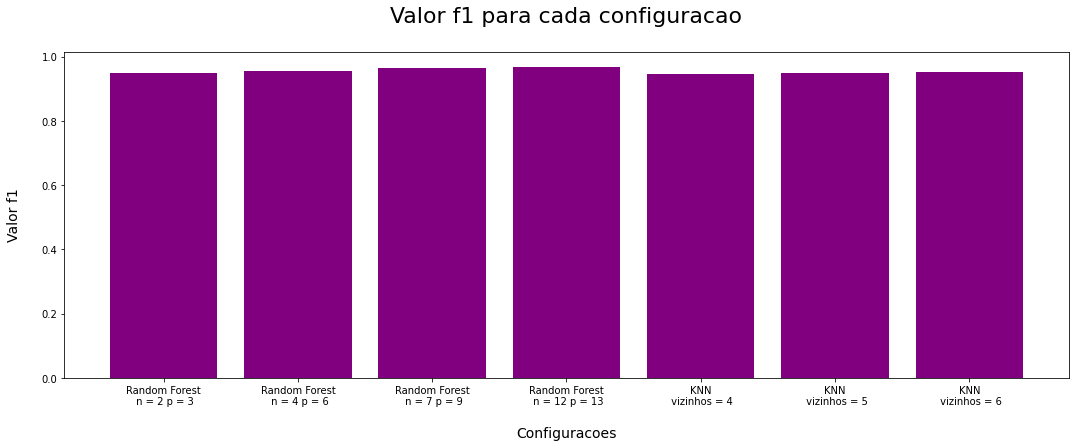


Melhor metodo foi Random Forest n = 12 p = 13, com valor f1 igual a 0.9667


In [ ]:
import matplotlib.pyplot as plt

configuracoes = list(resultados_tabela.keys())
valores_f1 = list(resultados_tabela.values())

fig = plt.figure(figsize = (18, 6))

plt.bar(configuracoes, valores_f1, color ='purple')

plt.xlabel("\nConfiguracoes", fontsize = 14)
plt.ylabel("Valor f1\n", fontsize = 14)
plt.title("Valor f1 para cada configuracao\n", fontsize = 22 )
plt.show()

maximo = valores_f1.index(max(valores_f1))
nome_maximo = configuracoes[maximo].replace("\n","")
print(f"\nMelhor metodo foi {nome_maximo}, com valor f1 igual a {round(valores_f1[maximo],4)}")

Não houve diferença significativa com a variação de parâmetros

# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [ ]:
# YOUR CODE HERE

def randomForestFeatures(data, k, numEstimadores, profundidade, numFeat):

  #Variavel alvo
  y = data.target

  #Restante dos dados
  x = pd.DataFrame(data.data,columns =[data.feature_names]).values

  colunas_selecionadas = np.random.randint(x.shape[1], size=(numFeat))

  x = x[:,colunas_selecionadas]

  #Criacao do modelo classificador
  modelo = RandomForestClassifier(n_estimators = numEstimadores, max_depth = profundidade)

  #Criacao do KFold
  kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=703)

  #Lista que ira guardar os resultados obtidos
  precisao = []
  revocacao = []
  f1 = []

  #Geracao dos resultados
  for treino, teste in kfold.split(x, y):
      x_treino, x_teste = x[treino], x[teste]
      y_treino, y_teste = y[treino], y[teste]
      modelo.fit(x_treino, y_treino)

      #avaliacao do modelo
      predicao = modelo.predict(x_teste)
      precisao.append(metrics.precision_score(y_teste, predicao))
      revocacao.append(metrics.recall_score(y_teste, predicao))
      f1.append(metrics.f1_score(y_teste, predicao))

  precisao.append(np.mean(precisao))
  revocacao.append(np.mean(revocacao))
  f1_mean = np.mean(f1)
  f1.append(f1_mean)

  # Exibicao dos resultados obtidos
  print(f"Configuracao: {numEstimadores} estimadores, {profundidade} profundidade maxima\nResultados:\n")

  resultados = pd.DataFrame([ precisao, revocacao,f1], columns = ["Iteracao 1","Iteracao 2","Iteracao 3","Iteracao 4","Iteracao 5","Media"])
  resultados.rename(index={0: 'precisao',1: 'revocacao',2: 'f1'},inplace=True)
  display(resultados)

  return f1_mean


In [ ]:
numeroEstimadores = 12
profunidade = 13
f1 = randomForestFeatures(cancer, SPLITS, numeroEstimadores, profundidade, 5)
print(f"\nf1 com 5 features selecionadas foi : {round(f1,4)}")

Configuracao: 12 estimadores, 13 profundidade maxima
Resultados:



,Iteracao 1,Iteracao 2,Iteracao 3,Iteracao 4,Iteracao 5,Media
precisao,0.878378,0.887324,0.890411,0.905405,0.888889,0.890082
revocacao,0.915493,0.887324,0.902778,0.930556,0.901408,0.907512
f1,0.896552,0.887324,0.896552,0.917808,0.895105,0.898668



f1 com 5 features selecionadas foi : 0.8987


Percebe-se que o valor de f1 diminui quando se usa apenas 5 features. Isso ocorreu porque durante a seleção aleatória de 5  dentre as 30 features iniciais, pode-se ter removido algumas que sejam muito importantes para a classificação